In [32]:
#word2vec libraries
import pandas as pd
import numpy as np
import re
import copy
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from pattern.text.en import singularize
import matplotlib.pyplot as plt

## Ingredientes recomendados que hacen falta para x receta
La idea es que el cliente también pueda buscar qué productos le hacen falta para realizar la receta que quiere

In [3]:
#Cargamos un dataset diferente:
ingredients_recipes_listas = pd.read_csv("ingredients_recipes_prueba_ingredientes_listas.csv")

In [4]:
ingredients_recipes_listas

,Unnamed: 0,title,ingredients_2,ingredients_3
0,0,"Lentil, Apple, and Turkey Wrap","['chicken', 'lentil', 'lentil', 'celery', 'pee...","['lowsodium vegetable chicken stock', 'dried b..."
1,1,Boudin Blanc Terrine with Red Onion Confit,"['cream', 'onion', 'salt', 'bay leaf', 'clove'...","['whipping cream', 'onion', 'salt', 'bay leaf'..."
2,2,Potato and Fennel Soup Hodge,"['fennel', 'onion', 'butter', 'potato', 'chick...",['fennel bulb sometimes called anise stalks di...
3,3,Mahi-Mahi in Tomato Olive Sauce,"['oil', 'onion', 'dry white wine', 'anchovy', ...","['extravirgin olive oil', 'onion', 'dry white ..."
4,4,Spinach Noodle Casserole,"['spinach', 'egg', 'cream', 'sauce', 'nutmeg',...","['ounce package frozen spinach souffl thawed',..."
...,...,...,...,...
20106,20125,Parmesan Puffs,"['egg', 'parmigianoreggiano finely grated', 'o...","['egg white', 'parmigianoreggiano finely grate..."
20107,20126,Artichoke and Parmesan Risotto,"['chicken', 'divided', 'oil', 'onion', 'baby a...","['lowsalt chicken broth', 'butter divided', 'e..."
20108,20127,Turkey Cream Puff Pie,"['tomato', 'onion', 'butter', 'salt', 'white m...","['tomato', 'onion finely', 'unsalted butter', ..."
20109,20128,Snapper on Angel Hair with Citrus Cream,"['oil', 'shallots thinly', 'clove', 'clam', 'c...","['olive oil', 'shallots thinly', 'garlic clove..."


In [5]:
type(ingredients_recipes_listas['ingredients_2'][0])

str

In [6]:
#al guardar el archivo en csv y cargarlo, las listas quedan almacenadas como strings
ingredients_recipes_listas['ingredients_2'][0]


"['chicken', 'lentil', 'lentil', 'celery', 'peeled', 'thyme', 'salt', 'tomato', 'apple', 'lemon', 'oil', 'pepper', 'tortilla', 'turkey', 'lettuce']"

In [7]:
#Eliminamos los caracteres especiales y separamos productos para que sea una lista
ingredients_recipes_listas['ingredients_2'] = [re.sub(r'[^a-zA-Z ]+', '', lista) for lista in ingredients_recipes_listas['ingredients_2']]
ingredients_recipes_listas['ingredients_2'] = [lista.split() for lista in ingredients_recipes_listas['ingredients_2']]

In [8]:
ingredients_recipes_listas['ingredients_2']

0        [chicken, lentil, lentil, celery, peeled, thym...
1        [cream, onion, salt, bay, leaf, clove, clove, ...
2           [fennel, onion, butter, potato, chicken, milk]
3        [oil, onion, dry, white, wine, anchovy, oregan...
4        [spinach, egg, cream, sauce, nutmeg, grated, s...
                               ...                        
20106       [egg, parmigianoreggiano, finely, grated, oil]
20107    [chicken, divided, oil, onion, baby, artichoke...
20108    [tomato, onion, butter, salt, white, mushrooms...
20109    [oil, shallots, thinly, clove, clam, cream, wh...
20110    [ham, clove, water, marmalade, cream, sugar, o...
Name: ingredients_2, Length: 20111, dtype: object

In [9]:
type(ingredients_recipes_listas['ingredients_2'][0])

list

### Ahora si revisamos qué ingredientes nos faltan para determinada receta
Lo ideal es que regrese los ingredientes tal como aparecen en el dataset de recetas (con detalle)

In [129]:
ingredients_recipes_listastest = ingredients_recipes_listas.loc[ingredients_recipes_listas['title']=='Lentil, Apple, and Turkey Wrap ']['ingredients_2']

In [130]:
ingredients_recipes_listastest = ingredients_recipes_listas[ingredients_recipes_listas['title']=='Lentil, Apple, and Turkey Wrap ']['ingredients_2']

### Tenemos que ver cómo convertimos lo anterior a lista úTIL

In [131]:
ingredients_recipes_listastest.tolist()

[['chicken',
  'lentil',
  'lentil',
  'celery',
  'peeled',
  'thyme',
  'salt',
  'tomato',
  'apple',
  'lemon',
  'oil',
  'pepper',
  'tortilla',
  'turkey',
  'lettuce']]

In [132]:
type(ingredients_recipes_listastest[0])

list

In [133]:
#Lista de prueba.... FUNCIONÓ
listax = ['chicken',
  'lentil',
  'lentil',
  'celery',
  'peeled',
  'thyme',
  'salt',
  'tomato',
  'apple',
  'lemon',
  'oil',
  'pepper',
  'tortilla',
  'turkey',
  'lettuce']

In [134]:
listax

['chicken',
 'lentil',
 'lentil',
 'celery',
 'peeled',
 'thyme',
 'salt',
 'tomato',
 'apple',
 'lemon',
 'oil',
 'pepper',
 'tortilla',
 'turkey',
 'lettuce']

In [135]:
ingredients_recipes_listastest = type(ingredients_recipes_listastest)

In [136]:
#Output es una lista de ingredientes que están faltan para la receta que el cliente quiera preparar
list(set(listax) - set(ingredientes_disponibles))

['peeled', 'lettuce', 'thyme', 'turkey', 'tortilla', 'lentil', 'celery']

In [137]:
#ingredients_recipes_listastest = ingredients_recipes_listas.loc[ingredients_recipes_listas['title']=='Lentil, Apple, and Turkey Wrap ']['ingredients_2']
#type(ingredients_recipes_listastest.tolist())
#ingredients_recipes_listastest.tolist()

In [138]:
#ingredients_recipes_listastest

El primer paso es que el cliente seleccione la receta

In [139]:
recomended_recipes

,disponibilidad
title,
Fully Salted Roast Chicken,1.0
Clarified Butter,1.0
Simple Lemon Dressing,1.0
Coconut Dulce de Leche,1.0
Tomato Butter,1.0
...,...
D.i.y. Drinks Bar,0.0
Daiquiri,0.0
Damn the Weather I,0.0


In [140]:
ingredients_recipes

,title,ingredients_2,disponibilidad
0,"Lentil, Apple, and Turkey Wrap",chicken,1
1,"Lentil, Apple, and Turkey Wrap",lentil,0
2,"Lentil, Apple, and Turkey Wrap",celery,0
3,"Lentil, Apple, and Turkey Wrap",peeled,0
4,"Lentil, Apple, and Turkey Wrap",thyme,0
...,...,...,...
164467,Baked Ham with Marmalade-Horseradish Glaze,water,0
164468,Baked Ham with Marmalade-Horseradish Glaze,marmalade,0
164469,Baked Ham with Marmalade-Horseradish Glaze,cream,0
164470,Baked Ham with Marmalade-Horseradish Glaze,sugar,1


# Modelo de ingredientes recomendados basado en la frecuencia de aparición en las recetas (Word2Vec)

In [10]:
ingredients_recipes_listas['ingredients_2'] = [list(dict.fromkeys(lista)) for lista in ingredients_recipes_listas['ingredients_2']] #Eliminamos duplicados
ingredients_recipes_listas['ingredients_2'] = [sorted(lista) for lista in ingredients_recipes_listas['ingredients_2']] #Se ordenan en orden alfabético para que todas las listas estén ordenadas bajo un patrón

In [11]:
lista_w2v = copy.deepcopy(ingredients_recipes_listas['ingredients_2'])

In [12]:
lista_w2v

0        [apple, celery, chicken, lemon, lentil, lettuc...
1        [baguette, bay, butter, chicken, chilled, clov...
2           [butter, chicken, fennel, milk, onion, potato]
3        [anchovy, bread, countrystyle, cut, divided, d...
4        [cheddar, cheese, cream, egg, grated, nutmeg, ...
                               ...                        
20106       [egg, finely, grated, oil, parmigianoreggiano]
20107    [artichokes, baby, chicken, divided, dry, halv...
20108    [butter, cheese, chicken, cut, dice, eggs, fin...
20109    [basil, clam, clove, cream, flmy, herb, lime, ...
20110    [clove, cream, ham, marmalade, orange, sugar, ...
Name: ingredients_2, Length: 20111, dtype: object

In [15]:
lista_w2v[1]

['baguette',
 'bay',
 'butter',
 'chicken',
 'chilled',
 'clove',
 'cream',
 'currant',
 'egg',
 'flmy',
 'halved',
 'leaf',
 'lettuce',
 'nutmeg',
 'oil',
 'onion',
 'onions',
 'parsley',
 'pepper',
 'peppercorn',
 'port',
 'red',
 'salt',
 'shallot',
 'sugar',
 'thyme',
 'vinegar']

In [16]:
lista_prueba = [i for i in lista_w2v[1] if i.endswith('ed') == False]

In [17]:
lista_prueba #Comprobamos que funciona!

['baguette',
 'bay',
 'butter',
 'chicken',
 'clove',
 'cream',
 'currant',
 'egg',
 'flmy',
 'leaf',
 'lettuce',
 'nutmeg',
 'oil',
 'onion',
 'onions',
 'parsley',
 'pepper',
 'peppercorn',
 'port',
 'salt',
 'shallot',
 'sugar',
 'thyme',
 'vinegar']

In [18]:
lista_w2v = [[i for i in lista if i.endswith('ed') == False] for lista in lista_w2v]

In [19]:
lista_w2v

[['apple',
  'celery',
  'chicken',
  'lemon',
  'lentil',
  'lettuce',
  'oil',
  'pepper',
  'salt',
  'thyme',
  'tomato',
  'tortilla',
  'turkey'],
 ['baguette',
  'bay',
  'butter',
  'chicken',
  'clove',
  'cream',
  'currant',
  'egg',
  'flmy',
  'leaf',
  'lettuce',
  'nutmeg',
  'oil',
  'onion',
  'onions',
  'parsley',
  'pepper',
  'peppercorn',
  'port',
  'salt',
  'shallot',
  'sugar',
  'thyme',
  'vinegar'],
 ['butter', 'chicken', 'fennel', 'milk', 'onion', 'potato'],
 ['anchovy',
  'bread',
  'countrystyle',
  'cut',
  'dry',
  'green',
  'inchthick',
  'mahimahi',
  'oil',
  'olives',
  'onion',
  'orange',
  'oregano',
  'slices',
  'white',
  'wine'],
 ['cheddar', 'cheese', 'cream', 'egg', 'nutmeg', 'sauce', 'sharp', 'spinach'],
 ['bacon',
  'basil',
  'bread',
  'butter',
  'countrystyle',
  'inchthick',
  'lettuce',
  'mayonnaise',
  'onion',
  'round',
  'slices',
  'white'],
 ['asparagus',
  'cut',
  'ham',
  'piece',
  'potatoes',
  'spinach',
  'sugar',
  

In [21]:
lista_w2v = [[singularize(x) for x in y] for y in lista_w2v] #words to singular

### Creación modelo de Bag of Words

In [22]:
word2vec = Word2Vec(lista_w2v, min_count=10) # productos que al menos estén en 10 recetas para filtrar algunos muy poco usados o que pueden explicar detalles muy específicos que faltó limpiar

In [23]:
vocabulary = word2vec.wv.key_to_index

In [24]:
vocabulary

{'oil': 0,
 'salt': 1,
 'sugar': 2,
 'pepper': 3,
 'onion': 4,
 'butter': 5,
 'ounce': 6,
 'lemon': 7,
 'water': 8,
 'egg': 9,
 'cream': 10,
 'clove': 11,
 'flmy': 12,
 'vinegar': 13,
 'chicken': 14,
 'garlic': 15,
 'parsley': 16,
 'sauce': 17,
 'white': 18,
 'milk': 19,
 'tomato': 20,
 'cut': 21,
 'vanilla': 22,
 'orange': 23,
 'lime': 24,
 'dry': 25,
 'thyme': 26,
 'powder': 27,
 'ginger': 28,
 'mustard': 29,
 'wine': 30,
 'cinnamon': 31,
 'shallot': 32,
 'cilantro': 33,
 'green': 34,
 'baking': 35,
 'leaf': 36,
 'celery': 37,
 'cumin': 38,
 'cheese': 39,
 'basil': 40,
 'mint': 41,
 'carrot': 42,
 'bay': 43,
 'potato': 44,
 'thinly': 45,
 'honey': 46,
 'yolk': 47,
 'piece': 48,
 'bread': 49,
 'chile': 50,
 'rice': 51,
 'scallion': 52,
 'rosemary': 53,
 'almond': 54,
 'chocolate': 55,
 'corn': 56,
 'parmesan': 57,
 'oregano': 58,
 'equipment': 59,
 'mayonnaise': 60,
 'chive': 61,
 'coriander': 62,
 'bacon': 63,
 'yogurt': 64,
 'pork': 65,
 'beef': 66,
 'fennel': 67,
 'coarsely': 68,
 

In [25]:
type(vocabulary)

dict

In [26]:
vocabulary_list = list(vocabulary.keys())

#### Representar el modelo de forma gráfica

Se plantea mostrar de forma gráfica una distribución espacial de los productos, de acuerdo a su frecuencia de aparición en las recetas, lo cual puede explicar algún grado de similitud entre ellos

In [27]:
array_words=word2vec.wv[vocabulary_list]
df=pd.DataFrame(array_words)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.089689,0.710027,-0.227552,0.657681,-0.464022,0.074153,0.146096,0.675705,0.446904,0.203739,...,-0.037961,0.235719,0.330359,0.121767,0.295774,0.649175,-0.353934,-0.200254,-0.291000,0.783975
1,-0.561290,0.258531,0.575901,0.878705,0.081147,0.196988,-0.087563,0.193955,0.022914,0.056797,...,0.147564,0.011582,0.516943,-0.442300,-0.262251,0.687638,0.564694,0.038964,-0.805686,0.812044
2,-0.758385,0.205561,0.352225,0.531450,0.801278,0.792432,0.102756,0.247556,-0.522939,0.012354,...,0.352867,0.433278,0.409204,-0.411925,0.648789,0.658904,0.470269,0.063993,0.457369,-0.656267
3,-0.918369,0.812490,-0.121906,0.254416,-0.254902,0.140543,-0.022227,0.561975,0.779671,-0.156160,...,-0.311117,0.191539,0.334815,-0.086864,0.468652,0.843558,0.377629,-0.053305,-0.486924,0.303714
4,-0.426683,0.206864,-0.452778,0.188851,-0.423855,0.334500,-0.000690,0.492277,0.752998,0.036948,...,-0.052530,0.053730,0.195248,0.253367,0.271291,0.604156,0.451631,0.068261,-0.257375,0.804902


In [28]:
df.shape

(1058, 100)

In [29]:
#Computing the correlation matrix
X_corr=df.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(array_words,new_vectors)

In [30]:
neww_X

array([[ 0.75179306,  2.72934487],
       [ 2.37832101,  0.01074393],
       [ 2.4919116 , -2.51307238],
       ...,
       [-0.31160137, -0.28912735],
       [ 0.1751793 , -0.31395373],
       [-0.15420475, -0.02782495]])

A continuación se hace una primera representación de los ingredientes en un gráfico espacial

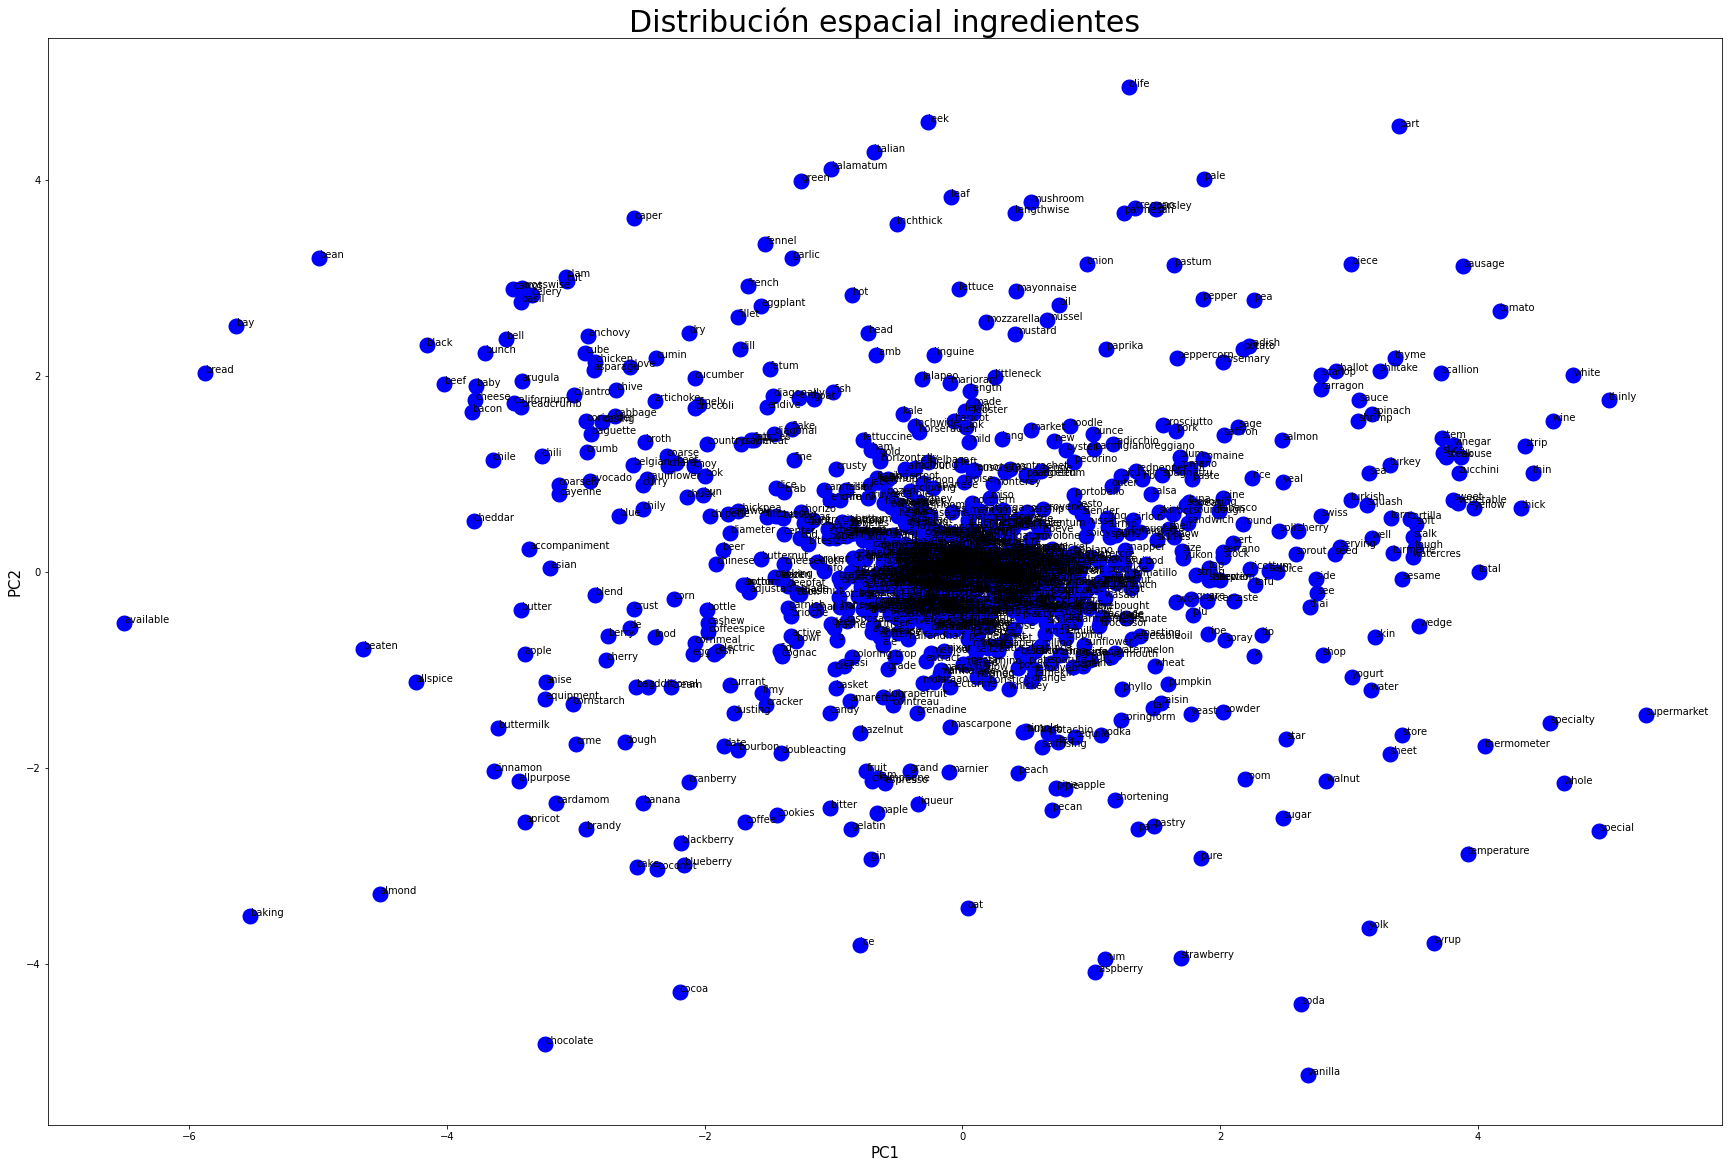

In [33]:

plt.figure(figsize=(30,20))
plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='blue')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Distribución espacial ingredientes",size=30)
for i, word in enumerate(vocabulary_list):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))

No es muy claro el gráfico, por lo que se procede a mejorarlo

#### Creación de clusters de productos con base en su aparición en las recetas

Aplicamos un algoritmo de aprendizaje no supervisado K-Means, mediante el que se busca agrupar productos asumiendo que de acuerdo con su frecuencia de aparición en el dataset y su uso con otros ingredientes indica mayor cercanía o distanciamiento con otros. Vemos que por la forma en que se obtuvieron los datos hay palabras que no corresponden a ingredientes, aunque decidimos dejarlas para conocer cómo estas también se relacionan con ingredientes.

Uno de los retos está en encontrar el número más adecuado de clusters que sea relevante para la toma de decisiones. 

Una de las técnicas para resolverlo es calcular para k número de grupos la suma de la distancia al cuadrado entre cada punto y el centroide (WCSS). A medida que aumenta el número de clústeres, el valor de WCSS comenzará a disminuir. El valor de WCSS es mayor cuando K = 1. Cuando analizamos el siguiente gráfico, podemos ver que el gráfico cambiará rápidamente en un punto y, por lo tanto, creará una forma de codo. Desde este punto, el gráfico comienza a moverse casi paralelo al eje X. En este caso esto puede verse cuando K=3 o cuando K=7, identificando posibles números óptimos de clusters.

Text(0, 0.5, 'WCSS')

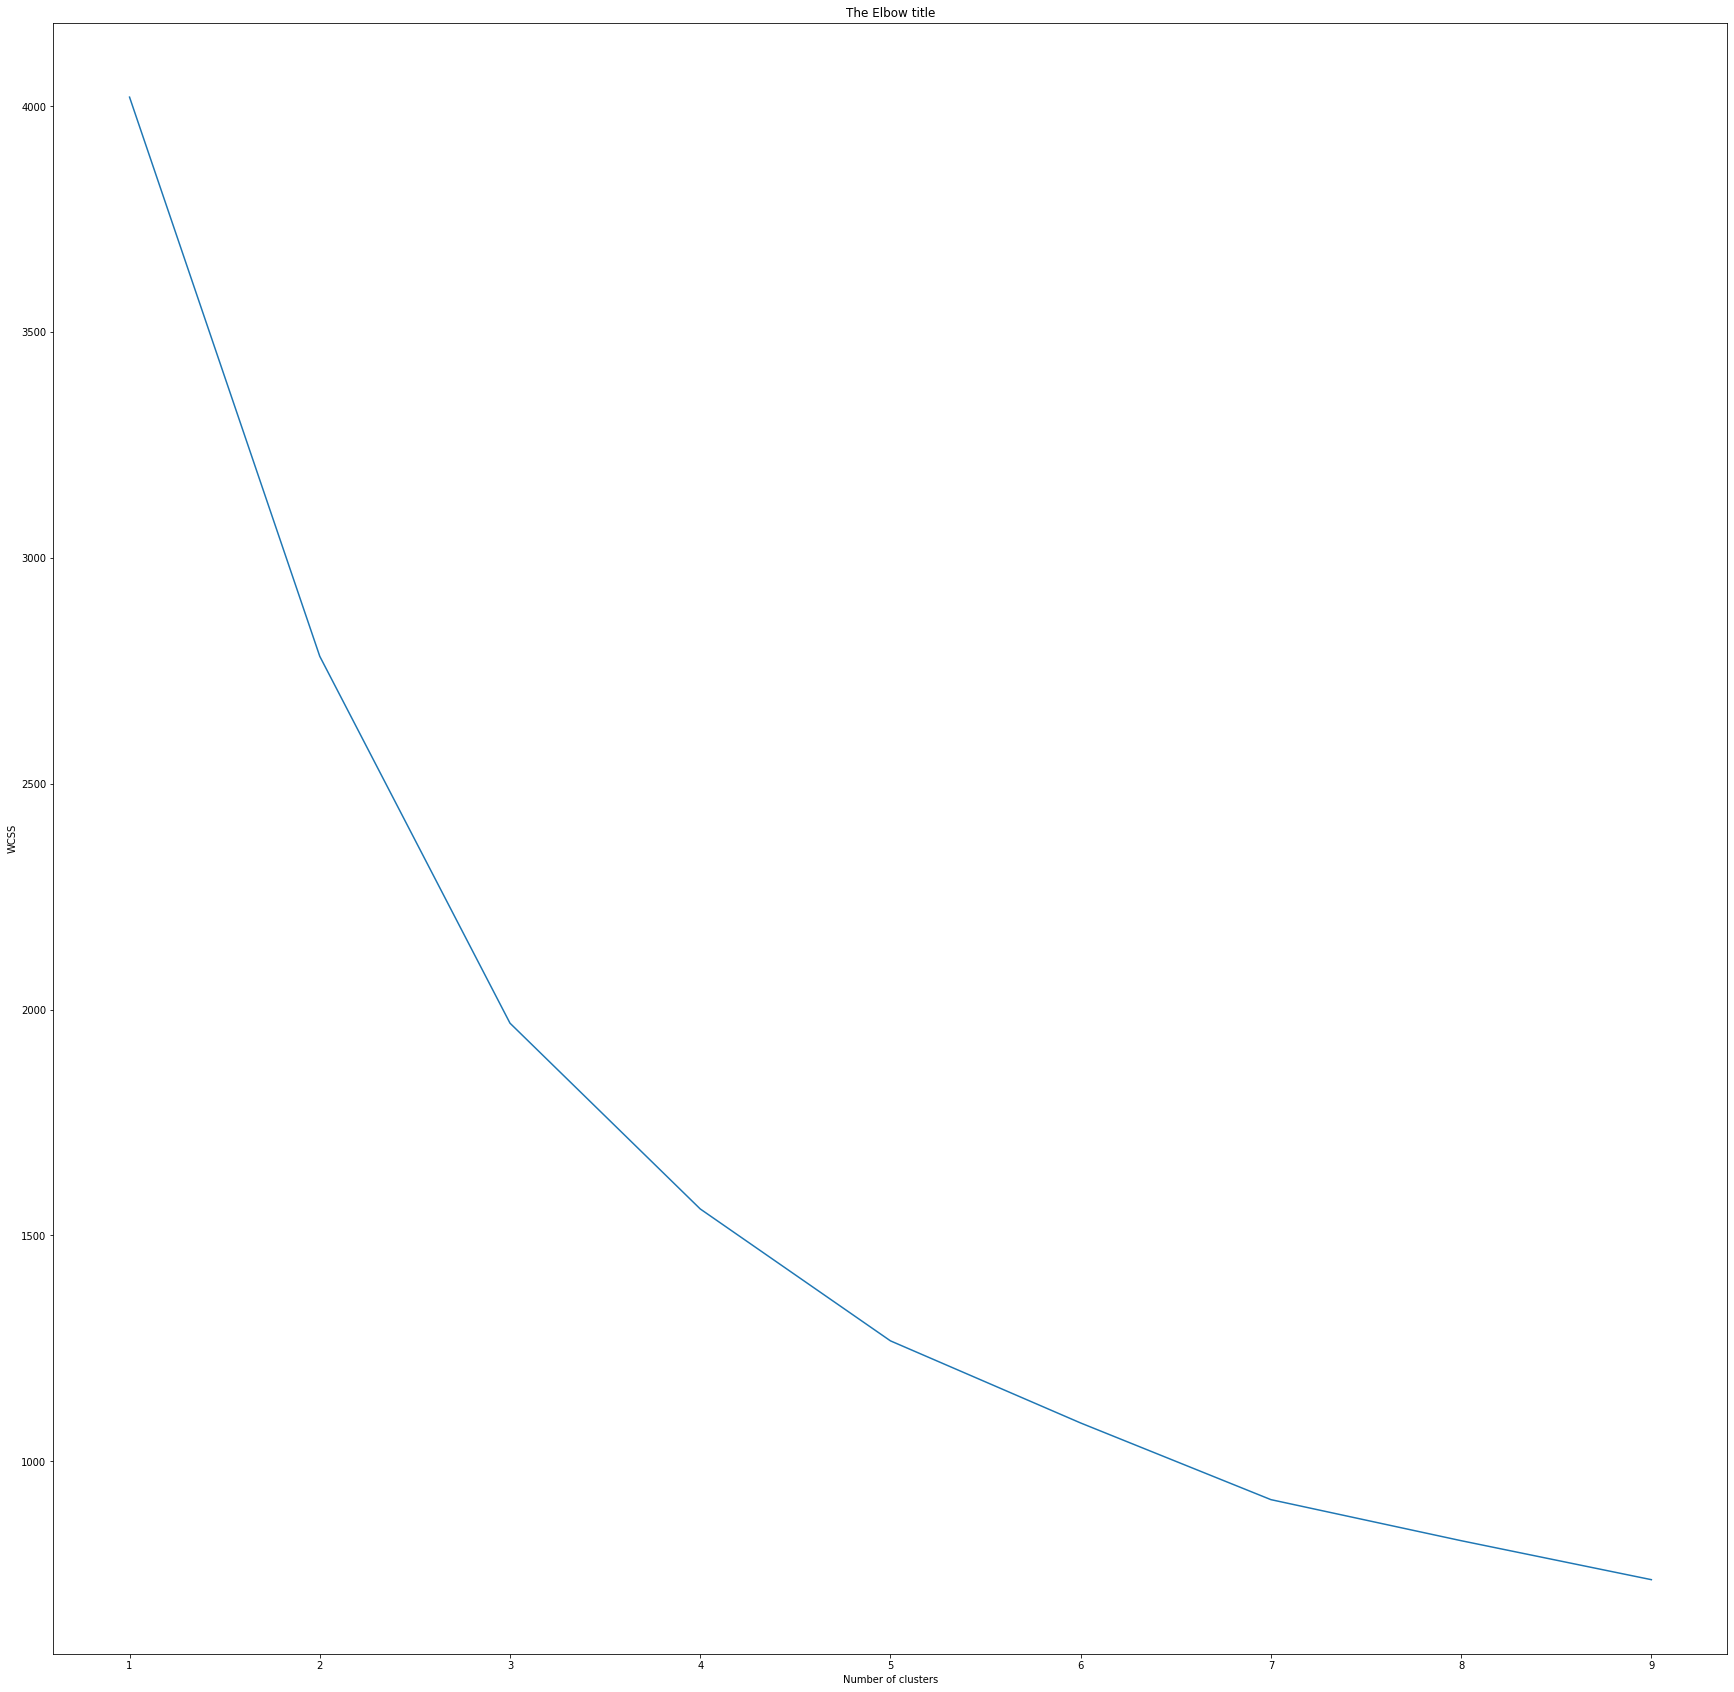

In [34]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(neww_X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1, 10)
plt.figure(figsize=(30,30))
plt.plot(number_clusters, wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


Probamos el resultado cuando K=3 y cuando K=7

In [35]:
kmeans3 = KMeans(3)
kmeans7 = KMeans(7)

In [36]:
kmeans3.fit(neww_X)
kmeans7.fit(neww_X)

KMeans(n_clusters=7)

In [37]:
identified_clusters3 = kmeans3.fit_predict(neww_X)
identified_clusters7 = kmeans7.fit_predict(neww_X)

Para verlo mucho mejor, optamos por seleccionar un número relevante de ingredientes que sean los que más se repiten.

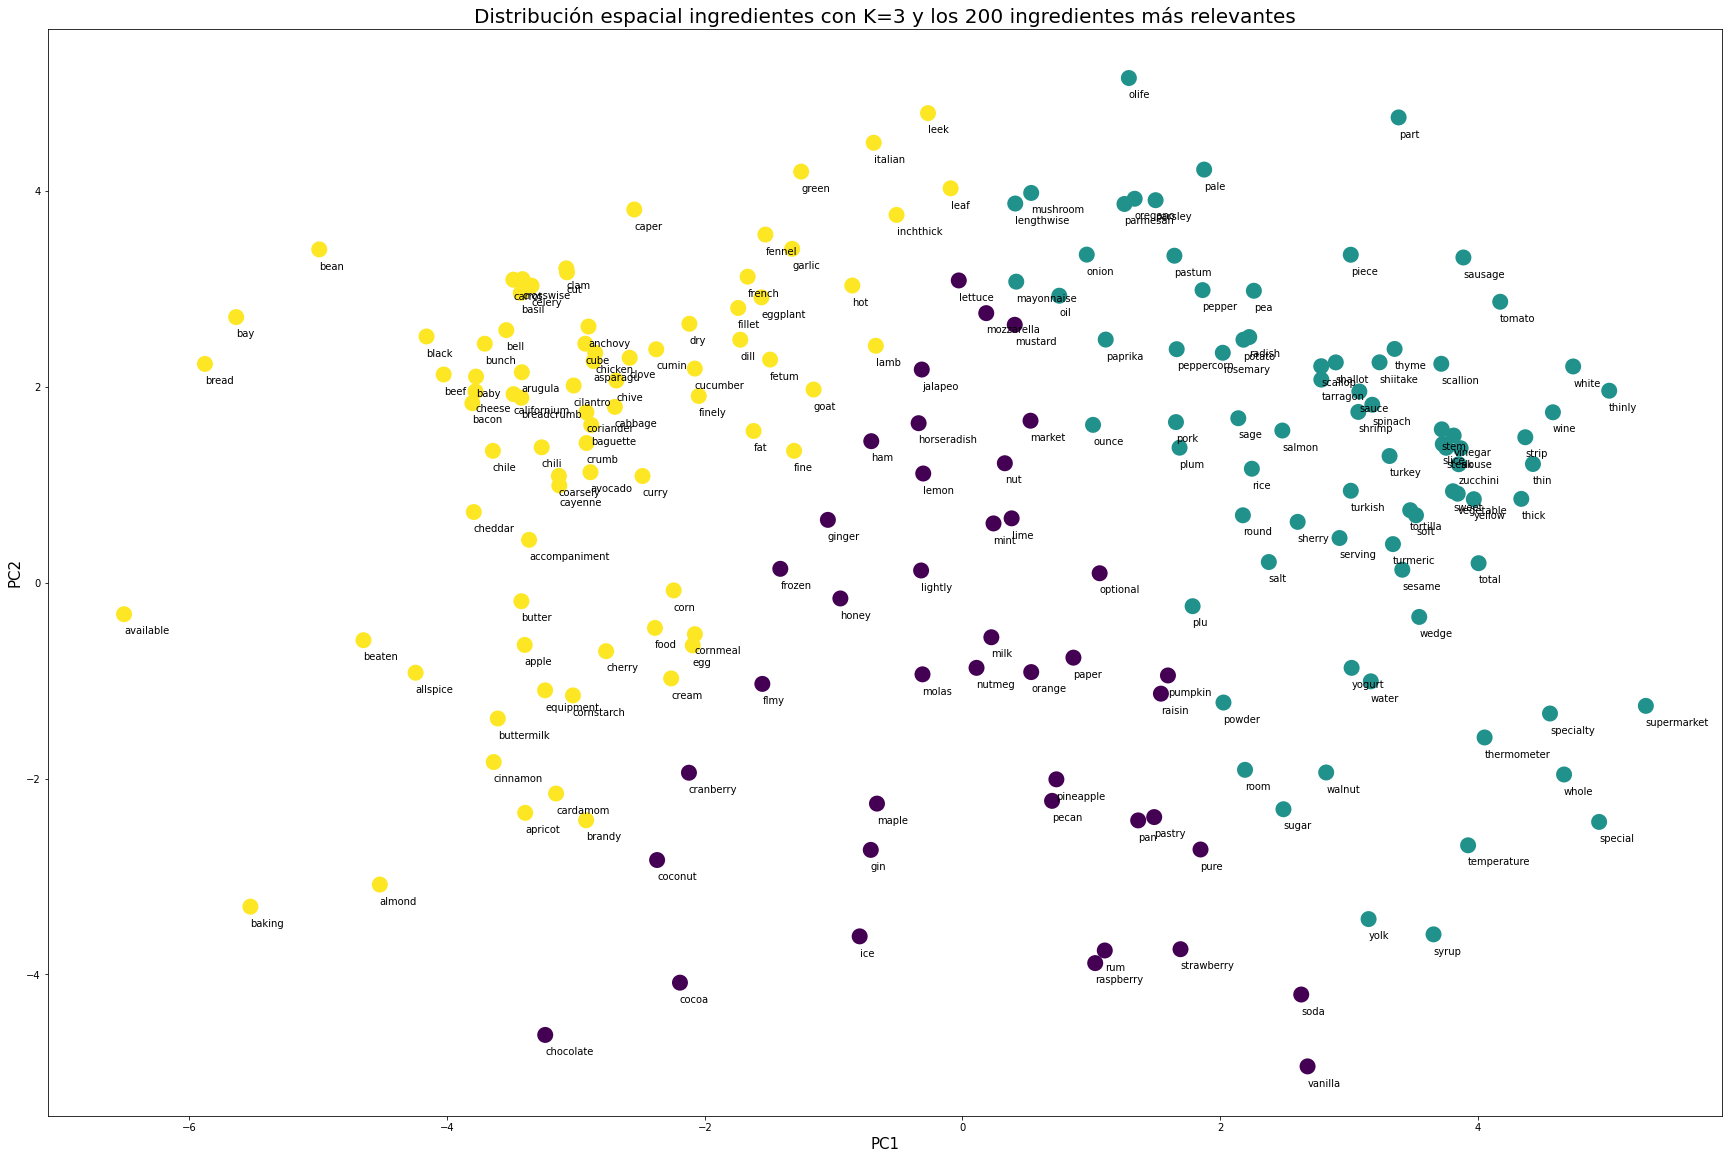

In [38]:
plt.figure(figsize=(30,20))
most_relevant_number = 200 # cambiar el número para ver determinar número de productos a mostrar en la gráfica
plt.scatter(neww_X[:most_relevant_number,0],
            neww_X[:most_relevant_number,1]+0.2, #para que el texto no quede encima del punto
            linewidths=10,
            c=identified_clusters3[:most_relevant_number])
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title(f"Distribución espacial ingredientes con K=3 y los {most_relevant_number} ingredientes más relevantes",size=20)
#vocab=list(model.wv.vocab)
for i, word in enumerate(vocabulary_list[:most_relevant_number]):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))

Aquí ya se ve con mayor claridad algunos productos que están más cercanos entre sí, como los que se suelen usar para hacer postres, como el azucar, la vainilla, el syrup), luego otros como la mayonesa y la mostaza muy cerca, así como varios tipos de queso cercanos entre sí... Pero es evidente que en tres clusters es muy difícil agrupar estos ingredientes, por lo que vemos lo que pasa cuando son 7 y aumentamos el número de ingredientes en el gráfico

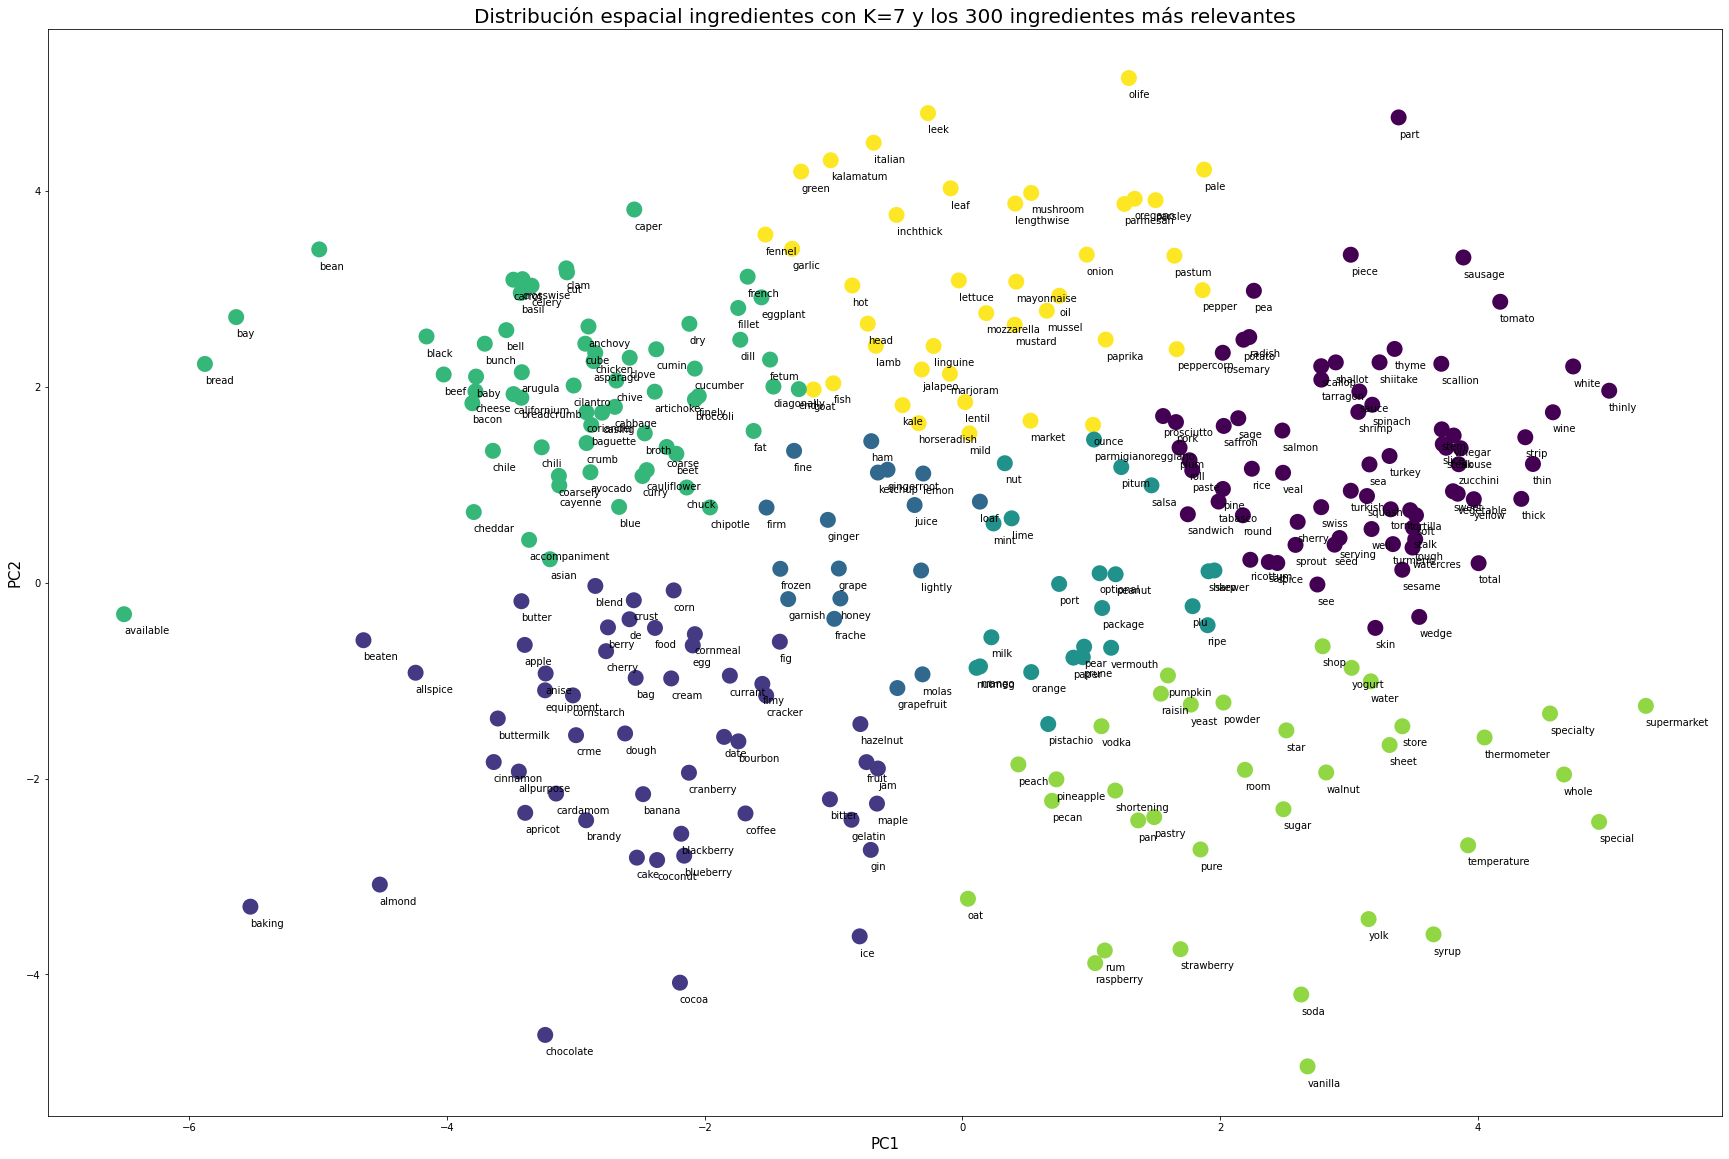

In [39]:
plt.figure(figsize=(30,20))
most_relevant_number = 300 # cambiar el número para ver determinar número de productos a mostrar en la gráfica
plt.scatter(neww_X[:most_relevant_number,0],
            neww_X[:most_relevant_number,1]+0.2, #para que el texto no quede encima del punto
            linewidths=10,
            c=identified_clusters7[:most_relevant_number]) #Cambia aquí
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title(f"Distribución espacial ingredientes con K=7 y los {most_relevant_number} ingredientes más relevantes",size=20) #cambia el título
#vocab=list(model.wv.vocab)
for i, word in enumerate(vocabulary_list[:most_relevant_number]):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))

Cuando se seleccionan más clusters se ve más marcada la diferencia entre algunos ingredientes que por ejemplo suelen ser usados para condimentar, o para añadir toques especiales a las recetas, pero que no suelen ser los protagonistas, así como se evidencian tendencias de ciertos elementos a ser usados en platos salados o dulces.

Se podría explorar más esto para crear nuevas recetas, sustitutivos de ingredientes y como herramientas de marketing en los supermercados.

In [56]:
palabra_prueba_w2v = 'chicken' #Esto es lo que habría que cambiar para ver el resto. Debe ser una palabra que esté en la lista
v_prueba_w2v = word2vec.wv[palabra_prueba_w2v]
print(v_prueba_w2v)
print(v_prueba_w2v.shape)

[ 0.6818126   0.04267867 -0.5991341  -0.5669069  -0.5680604  -0.42051136
  0.14232084  1.0579154   0.47585973 -0.39827737  0.29111284 -0.20086612
 -0.37327957  0.56615674 -0.95829993  0.29769418 -0.23311183  0.3421888
  0.0447087  -1.0609595   0.00507633 -0.42420596 -0.46276885 -0.7473013
 -0.930101   -0.43214804  0.33539182 -0.53869146 -0.03782436 -0.00885004
 -0.06169373 -0.23728317  0.8352208  -0.75912505 -0.13747275 -0.06695361
  0.07006139 -0.5148195  -0.3066152  -0.12507913  0.19800474  0.5760109
  0.02644144  0.45911378  0.79431707  0.473897   -0.19698675 -0.28396896
  0.253003    0.6025745  -0.21568643  0.37812725  0.3704292  -0.05275635
  0.03600439 -0.20344542 -0.5116008   0.775514    0.0273894   0.51360536
  0.40154803 -0.12264627  0.3393317   0.21515033  0.39894938 -0.29742825
 -0.344477    0.1507354  -0.6172723   0.02711547  0.63968194  0.32842898
  0.05627425  0.19420044  1.1957132  -0.54293096  0.21860164  0.266652
  0.60082096  0.3896616  -0.18937156 -0.00205208 -0.3814

In [57]:
productos_similares = word2vec.wv.most_similar(palabra_prueba_w2v) #Aquí el producto que buscará
print(productos_similares)

[('carrot', 0.9194934368133545), ('celery', 0.9193822145462036), ('fat', 0.9149901866912842), ('beef', 0.9020912647247314), ('broth', 0.8863251805305481), ('clam', 0.886309802532196), ('bay', 0.8693255186080933), ('chuck', 0.8650708198547363), ('clove', 0.8611671328544617), ('caraway', 0.8572816848754883)]


En este caso, por el sentido del proyecto, que es relacionar los ingredientes con las recetas, solo se tuvo en cuenta para el clustering el modelo de Bag of Words aplicado a los ingredientes usados en el dataset. En ese sentido, se puede agrupar los productos con otros sentidos y quizás llegar a otro tipo de conclusiones.